# Backup Coverage Location Problem（BCLP）

## Problem Description

### BCLP
在基于覆盖范围的位置模型中，只有当需求完全在设施的覆盖范围内时，它才被认为是“被覆盖的”。因此，当额外的设施也满足需求时，就提供了二级(或备用)保障。在预算约束下，一次和二次覆盖可以公式化为一个多目标优化问题，称为BCLP。

*Parameters*:

$\begin{array}
\\ & & i & \small = & \textrm{ index of demand }, i = 1,..., n; \\
& & j & \small = & \textrm{ index of potential facility locations }, j = 1, ..., m; \\
& & N_i & \small = & \{j | λ_{ij} = 1\}; \\
& & a_{i} & \small = & \textrm{ importance of demand } i; \\
& & p & \small = & \textrm{ number of facilities to be located } \\
\end{array}$

*Decision variables*:
$
$\begin{array}
$ x_j= \begin{cases}1, & \text { if a facility is located at } j, \\ 0, & \text { else }\end{cases}\\
 y_i= \begin{cases}1, & \text { if demand } i \text{ is covered by a sited facility }, \\ 0, & \text { else }\end{cases}\\
 u_i= \begin{cases}1, & \text { if demand } i \text{ is covered twice }, \\ 0, & \text { else }\end{cases}\\
 λ_{i j}= \begin{cases}1, & \text { if demand } i \text { is covered by a potential facility } j, \\ 0, & \text { else }\end{cases}
\end{array}$
$

###  Integer programming model:

\begin{array}{lll}
\max & Z_{1}=\sum_{i}{a_iy_i} && \\
\max & Z_{2}=\sum_{i}{a_iu_i} && \\
\text { s.t. } & \sum_{j\in N_i}{x_j-y_i-u_i \geq 0} & \forall i & \\
            & u_i-y_i \leqslant 0 & \forall i & \\
            & \sum_{j}{x_j = p} &  \\
            & x_j = \{0,1\} & \forall j & \\
            & y_i, u_i = \{0,1\} & \forall i & \\
\end{array}
        

## Setup

In [1]:
from pulp import *
import random
from itertools import product
import numpy as np
from location.CModel import BackupCoveringModel
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import osmnx as ox

## Example

### Random Data

In [2]:
np.random.seed(0) # random seed
random.seed(0)
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  

Restricted license - for non-production use only - expires 2024-10-28
No parameters matching '_test' found
['GLPK_CMD', 'CPLEX_PY', 'GUROBI', 'SCIP_CMD']


In [3]:
radius = 0.35
num_points = 10
num_facilities = 5
setup_cost = np.random.randint(6, size=num_points)
points = [(random.random(), random.random()) for i in range(num_points)]
points_np = np.array(points)
A = np.sum((points_np[:, np.newaxis, :] - points_np[np.newaxis, :, :]) ** 2, axis = -1) ** 0.5
mask = A <= radius
A[mask] = 1
A[~mask] = 0
selected, served_once, served_twice, obj = BackupCoveringModel(num_points=num_points, 
                                                               num_facilities=num_facilities,
                                                               setup_cost=setup_cost,
                                                               cover=A,
                                                               solver=SCIP_CMD()).prob_solve()

Status: Optimal
Selected position =  [0, 2, 3, 4, 8]
Served once =  [0, 1, 3, 4, 5, 6, 7, 8, 9]
Served twice =  [0, 1, 3, 4, 5, 7, 8, 9]
Max served number =  57.0


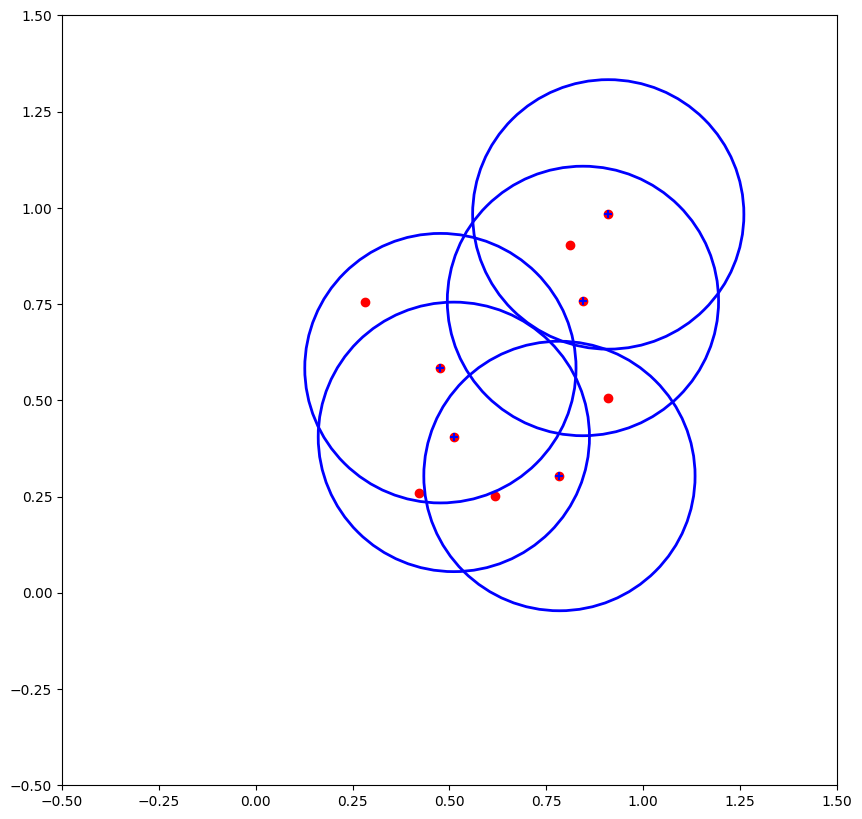

In [4]:
def display_points_with_mclp(data, ax,solution, radius):
    ax = plt.gca()
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.scatter(data[:, 0], data[:, 1], c='red')
    for i in solution:
        plt.scatter(data[i][0], data[i][1], c='blue', marker='+')
        circle = Circle(xy=(data[i][0], data[i][1]), radius=radius, color='b', fill=False, lw=2)
        ax.add_artist(circle)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
display_points_with_mclp(points_np, ax1, selected, radius)

### Road Network Data

In [5]:
df = pd.read_csv('北京POI裁剪.csv',encoding='gbk')
df = df.query('adname=="东城区" | adname=="西城区" | adname=="朝阳区" | adname=="海淀区"').reset_index(drop=True)
data = df[['long', 'lat']]
num_points = df.shape[0]
num_facilities = 25
np.random.seed(0)
setup_cost = np.random.randint(6, size=num_points)
points = [(data['long'][i], data['lat'][i]) for i in range(num_points)]

In [6]:
radius = 0.05
points_np = np.array(points)
A = np.sum((points_np[:, np.newaxis, :] - points_np[np.newaxis, :, :]) ** 2, axis = -1) ** 0.5
mask = A <= radius
A[mask] = 1
A[~mask] = 0

In [7]:
selected, served_once, served_twice, obj = BackupCoveringModel(num_points=num_points, 
                                                               num_facilities=num_facilities,
                                                               setup_cost=setup_cost,
                                                               cover=A,
                                                               solver=SCIP_CMD()).prob_solve()

Status: Optimal
Selected position =  [7, 11, 12, 14, 27, 39, 40, 55, 59, 71, 89, 91, 102, 103, 104, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]
Served once =  [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 17, 18, 19, 20, 22, 23, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 51, 52, 53, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 114, 115, 116, 117]
Served twice =  [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 17, 18, 19, 20, 22, 23, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 51, 52, 53, 55, 56, 57, 58, 60, 62, 63, 64, 65, 66, 67, 68, 69, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 93, 94, 95, 96, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 114, 115, 116, 117]
Max served number =  556.0


In [8]:
def display_mclp_with_road_network(data, solution, radius):
    for j in range(num_points):
        if j in selected:
            lx = df['lat'][j]
            ly = df['long'][j]
            plt.plot(ly,lx,c='red',marker='*',markersize=50, zorder=3)
        else:
            lx = df['lat'][j]
            ly = df['long'][j]
            plt.plot(ly,lx,c="black",marker='o',markersize=20, zorder=2)
    ax = plt.gca()
    for i in solution:
        circle = Circle(xy=(data[i][0], data[i][1]), radius=radius, color='#1E90FF', fill=False, lw=5)
        ax.add_artist(circle)

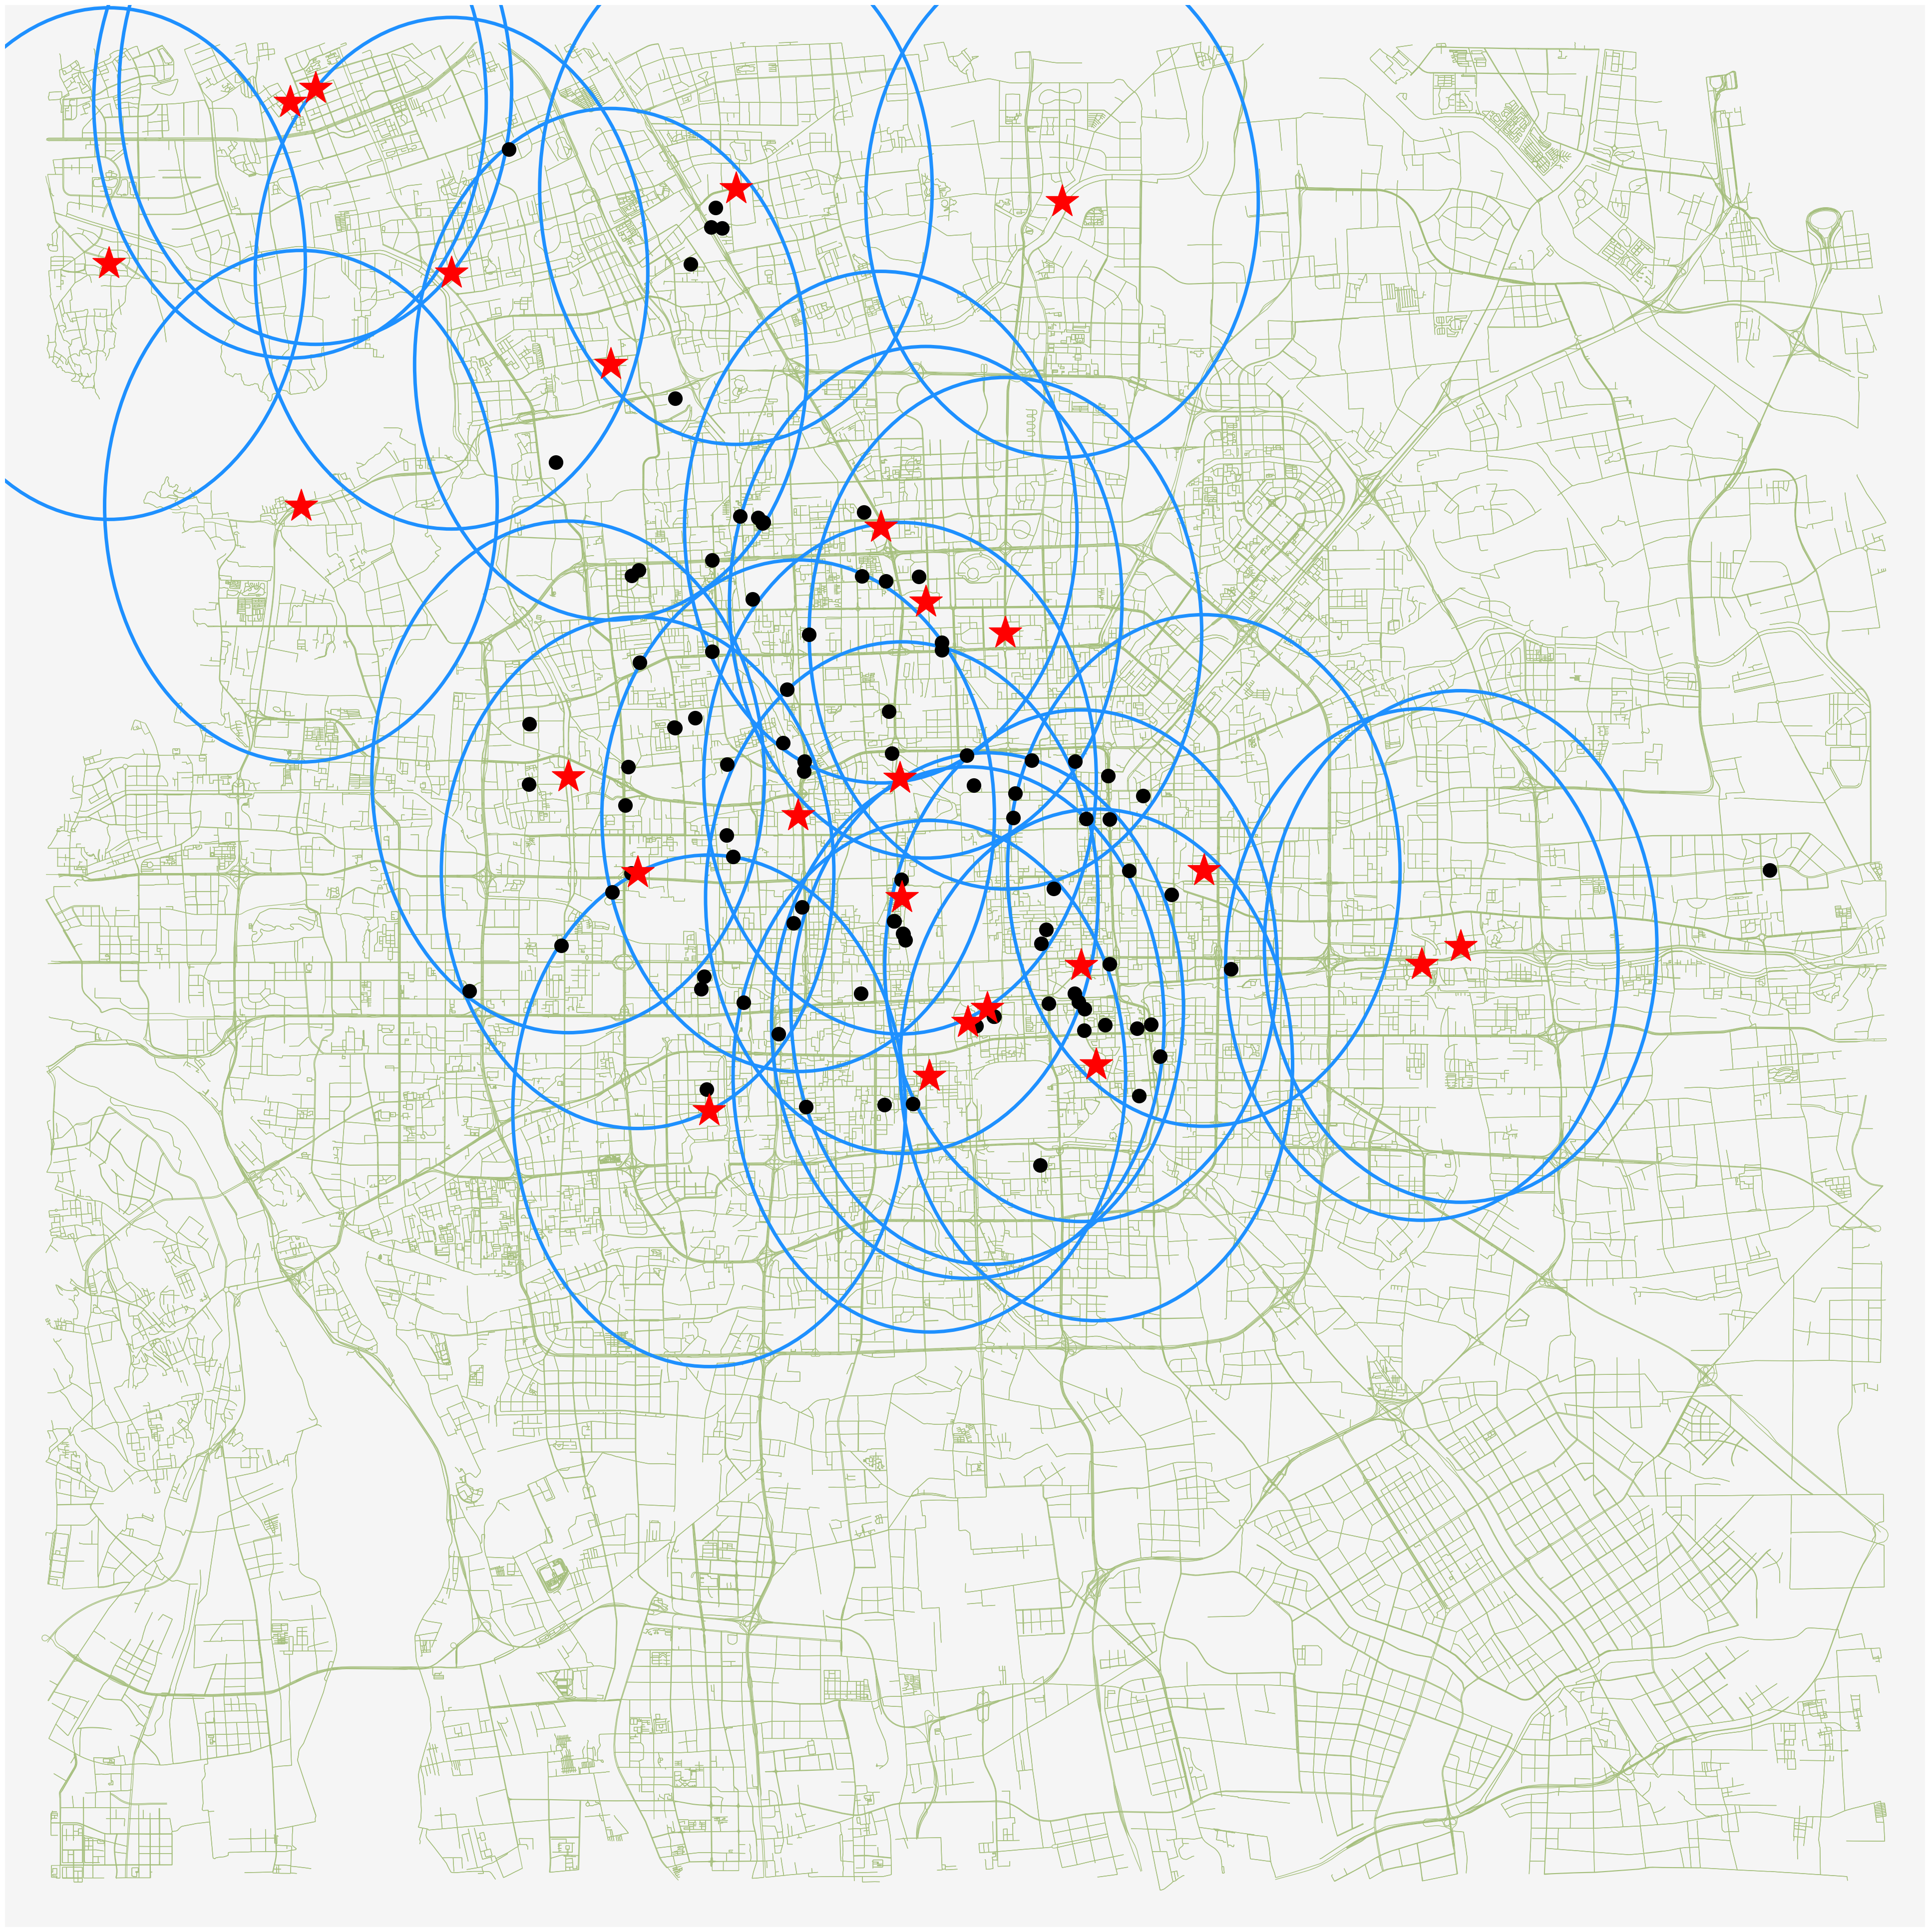

In [9]:
G = ox.graph_from_address('Beijing', dist=20000, network_type='drive')
ox.plot_graph(G, figsize=(50,50),bgcolor="#F5F5F5",node_size=0,edge_color = "#A4BE7B", show=False, close=False)
display_mclp_with_road_network(points_np, selected, radius)